In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_moons
from sklearn.model_selection import train_test_split

# Import the JY_Toolkit that complete by my hands
import os,sys
parentdir = os.path.dirname(os.path.abspath('.'))
temp_path = os.path.join(parentdir,'JY_Toolkit')
sys.path.insert(0,temp_path)
from JY_Toolkit import Jy_makeDataset,Jy_dataSetProcess
# from sklearn.linear_model import perception

In [2]:
#生成数据 (2,1000) (1,1000)
randseed = 5648
m = 2000
# X,y = make_classification(n_samples=m, n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1,random_state= randseed)
#X,y = make_moons(n_samples=m,noise=0.05)

Jy_makeDataset.random_state(randseed)
X,y = Jy_makeDataset.draw_HalfMoon(n_sample= 2000,positive_val= 1 ,negative_val= 0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = randseed)

print(type(X_train))
print(X)

<class 'numpy.ndarray'>
[[6.28931863 9.45545867]
 [5.46260061 9.31835416]
 [9.4698594  1.67297165]
 ...
 [6.02085947 9.89922791]
 [1.4206736  6.52992423]
 [6.93191541 2.75500919]]


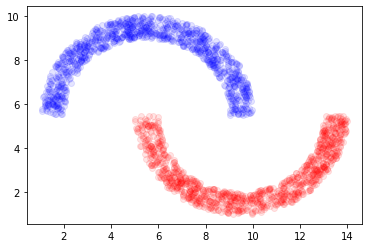

In [3]:
#绘图显示
#将数据进行分类 f1,f2为样本的特征
positive_f1 = [X[i,0] for i in range(len(X)) if y[i] == 0]
positive_f2 = [X[i,1] for i in range(len(X)) if y[i] == 0]
negetive_f1 = [X[i,0] for i in range(len(X)) if y[i] == 1]
negetive_f2 = [X[i,1] for i in range(len(X)) if y[i] == 1]
 
plt.figure()
plt.scatter(positive_f1,positive_f2,c = 'red',alpha=0.1)
plt.scatter(negetive_f1,negetive_f2,c = 'blue',alpha=0.1)

In [ ]:
# numpy to pandas
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

y_train[y_train[0] == 0] = -1
y_test[y_test[0] == 0] = -1
# len(X_train)


In [ ]:


class Perception(object):
    def __init__(self,w_dim,b0 = 0,l_rate = 0.01,epoch = 10):
        self.w = np.ones(w_dim,dtype=np.float32) # w_dim = len(X_train.columns)
        self.b = b0
        self.l_rate = l_rate   # 先固定学习率
        self.epoch = epoch
        self.accuracy = []

    def sign(self,x,w,b) -> int: # 定义符号函数
        y = np.dot(x,w) + b
        y = float(y)
        if y >= 0:
            return 1
        else:
            return -1
    def Weighted_sum(self,x,w,b) -> float:
        y = np.dot(x,w) + b
        return y
    
    def fit(self,x_train,y_train):
        #
        self.accuracy.clear()
        accuracy_temp = 0
        for iter_ in range(self.epoch):
            for i in range(len(x_train)):
                xi = x_train.iloc[i]
                yi = y_train.iloc[i]
                accuracy_temp += float(yi) * float(self.Weighted_sum(xi, self.w, self.b))
                # SGD
                # if  self.sign(xi, self.w,self.b) < 0:
                self.w += np.dot(xi,float(yi)) * self.l_rate
                self.b += yi * self.l_rate
            self.accuracy.append(float(accuracy_temp))
            if iter_%10 == 0:
                print('time :',iter_,'accuracy: ',float(accuracy_temp))
                print('w = ',list(self.w),'b=',float(self.b))
                y_predict = perception.predict(X_test)
                print('score : ',perception.score(y_predict, y_test))
                line_w_ = -1*(self.w[0]/self.w[1])
                line_b_ = -1*(float(self.b)/self.w[1])
                print('line_w_:',line_w_,'line_b_',line_b_)
            accuracy_temp = 0
    def predict(self,x_test):
        y = []
        for i in range(len(x_test)):
            xi = x_test.iloc[i]
            y.append(self.sign(xi, self.w,self.b))
        return y.copy()

    def score(self,y,label):
        accuracy = 0
        for i in range(len(y)):
            if  y[i] == label.iloc[i][0]:
                accuracy += 1
        return accuracy / len(label)

    pass


In [ ]:

if __name__ == '__main__':

    perception = Perception(len(X_train.columns),epoch= 20,l_rate= 0.01)
    perception.fit(X_train, y_train)
    y_predict = perception.predict(X_test)
    print('score : ',perception.score(y_predict, y_test))
    # 可视化
    #绘图显示
    #将数据进行分类 f1,f2为样本的特征
    positive_f1 = [X_test.iloc[i][0] for i in range(len(X_test)) if y_test.iloc[i][0] == 1]
    positive_f2 = [X_test.iloc[i][1] for i in range(len(X_test)) if y_test.iloc[i][0] == 1]
    negetive_f1 = [X_test.iloc[i][0] for i in range(len(X_test)) if y_test.iloc[i][0] == -1]
    negetive_f2 = [X_test.iloc[i][1] for i in range(len(X_test)) if y_test.iloc[i][0] == -1]

    # positive_f1_pre = [X_test.iloc[i][0] for i in range(len(X_test)) if y_predict[i] == 1]
    # positive_f2_pre = [X_test.iloc[i][1] for i in range(len(X_test)) if y_predict[i] == 1]
    # negetive_f1_pre = [X_test.iloc[i][0] for i in range(len(X_test)) if y_predict[i] == -1]
    # negetive_f2_pre = [X_test.iloc[i][1] for i in range(len(X_test)) if y_predict[i] == -1]

    mistake_f1_pre = [X_test.iloc[i][0] for i in range(len(X_test)) if y_predict[i] != y_test.iloc[i][0]]
    mistake_f2_pre = [X_test.iloc[i][1] for i in range(len(X_test)) if y_predict[i] != y_test.iloc[i][0]]


    fig = plt.figure(num=1,figsize=(14,6))
    ax1 = fig.add_subplot(121)

    ax1.scatter(positive_f1,positive_f2,c = 'red',alpha=0.5)
    ax1.scatter(negetive_f1,negetive_f2,c = 'blue',alpha=0.5)

    line_x = np.linspace(0,14,100)

    line_w = -1*(perception.w[0]/perception.w[1])
    line_b = -1*(float(perception.b)/perception.w[1])

    line_y = list(map(lambda x : x*line_w + line_b ,line_x))

    ax1.plot(line_x,line_y,c = 'orange')

    ax2 = fig.add_subplot(122)

    # ax2.scatter(positive_f1,positive_f2,c = 'green',alpha=0.5)
    # ax2.scatter(negetive_f1,negetive_f2,c = 'orange',alpha=0.5)

    ax2.scatter(mistake_f1_pre,mistake_f2_pre,c = 'orange',alpha=0.5)
    ax2.plot(line_x,line_y,c = 'orange')


    print(line_w,line_b)

    plt.show()

    


In [ ]:
# 生产两个半月形数据

def make_halcir(n_sample ,x : float ,y : float ,strart_angle ,end_angle,width,random = 1):
    positive_n = n_sample/2;
    pass

# 以下为使用 sklearn 自带的感知器算法代码

In [ ]:
'''
line_w_: -0.016316106542944908 line_b_ 0.022298641592389038


'''

# #使用默认参数拟合模型
# p_clf = perception()
# p_clf.fit(X_train,y_trian)
# print(p_clf.coef_,p_clf.intercept_)

In [ ]:
# print('准确率 {}'.format(p_clf.score(X_test,y_test)))

In [ ]:
# #绘图显示
# #将数据进行分类 f1,f2为样本的特征
# positive_f1 = [X[i,0] for i in range(1000) if y[i] == 0]
# positive_f2 = [X[i,1] for i in range(1000) if y[i] == 0]
# negetive_f1 = [X[i,0] for i in range(1000) if y[i] == 1]
# negetive_f2 = [X[i,1] for i in range(1000) if y[i] == 1]

# plt.figure()
# plt.scatter(positive_f1,positive_f2,c = 'red',alpha=0.1)
# plt.scatter(negetive_f1,negetive_f2,c = 'blue',alpha=0.1)
# """
# w1*f1 + w2*f2 + b = 0
# f2 = (-b - w1*f1)/w2
# f2 = -f1*(w1/w2) -b/w2
# """  
# line_f1 = np.arange(-3,4)
# line_f2 = -line_f1*(p_clf.coef_[0][0]/p_clf.coef_[0][1])-(p_clf.intercept_/p_clf.coef_[0][1])
# plt.plot(line_f1,line_f2)
# plt.show()

In [ ]:
# p_clf.coef_